### Importamos variables

In [1]:
### Manipulación de Datos
import pandas as pd
import numpy as np

### Visualización de Datos
import seaborn as sns
import matplotlib.pyplot as plt

### Tratamiento de datos
from utils.funciones import CategoricalAnalysis, extended_describe

### Importamos datos    

In [67]:
df = pd.read_csv(r"data\raw\Online_Services.csv")
df.head()

,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type
0,0002-ORFBO,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable
1,0003-MKNFE,Yes,Yes,No,No,No,No,No,Yes,Yes,Cable
2,0004-TLHLJ,Yes,Yes,No,No,Yes,No,No,No,No,Fiber Optic
3,0011-IGKFF,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic
4,0013-EXCHZ,Yes,Yes,No,No,No,Yes,Yes,No,No,Fiber Optic


|Column Name |	Description| 
|--------------|----------|
|CustomerID	|A unique ID that identifies each customer.|
|Phone Service|	Indicates if the customer subscribes to home phone service with the company: Yes, No|
|Internet Service|	Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.|
|Online Security|	Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No|
|Online Backup|	Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No|
|Device Protection Plan|	Indicates if the customer subscribes to an additional device protection plan: Yes, No|
|Premium Tech Support|	Indicates if the customer subscribes to an additional technical support plan: Yes, No|
|Streaming TV|	Indicates if the customer uses their Internet service to stream television programming: Yes, No|
|Streaming Movies|	Indicates if the customer uses their Internet service to stream movies: Yes, No|
|Streaming Music|	Indicates if the customer uses their Internet service to stream music: Yes, No|
|Internet Type| Indicates the type of the internet user|

In [5]:
print(f'La base de datos a analizar posee {df.shape[0]} filas y {df.shape[1]} columnas')
print(f'\nLas features que tenemos son: {list(df.columns[:-1])}')

La base de datos a analizar posee 7043 filas y 11 columnas

Las features que tenemos son: ['customer_id', 'phone_service', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music']


### Primera exploración

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           7043 non-null   object
 1   phone_service         7043 non-null   object
 2   internet_service      7043 non-null   object
 3   online_security       7043 non-null   object
 4   online_backup         7043 non-null   object
 5   device_protection     7043 non-null   object
 6   premium_tech_support  7043 non-null   object
 7   streaming_tv          7043 non-null   object
 8   streaming_movies      7043 non-null   object
 9   streaming_music       7043 non-null   object
 10  internet_type         5517 non-null   object
dtypes: object(11)
memory usage: 605.4+ KB


In [61]:
df.describe(include="object")

,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,5517
unique,7043,2,2,2,2,2,2,2,2,2,3
top,9995-HOTOH,Yes,Yes,No,No,No,No,No,No,No,Fiber Optic
freq,1,6361,5517,5024,4614,4621,4999,4336,4311,4555,3035


In [62]:
df.isna().sum()

customer_id                0
phone_service              0
internet_service           0
online_security            0
online_backup              0
device_protection          0
premium_tech_support       0
streaming_tv               0
streaming_movies           0
streaming_music            0
internet_type           1526
dtype: int64

In [63]:
df[df['internet_service'] == 'No']

,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type
20,0023-UYUPN,Yes,No,No,No,No,No,No,No,No,NaN
23,0030-FNXPP,Yes,No,No,No,No,No,No,No,No,NaN
24,0031-PVLZI,Yes,No,No,No,No,No,No,No,No,NaN
27,0040-HALCW,Yes,No,No,No,No,No,No,No,No,NaN
28,0042-JVWOJ,Yes,No,No,No,No,No,No,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7026,9970-QBCDA,Yes,No,No,No,No,No,No,No,No,NaN
7028,9972-EWRJS,Yes,No,No,No,No,No,No,No,No,NaN
7032,9975-GPKZU,Yes,No,No,No,No,No,No,No,No,NaN
7033,9975-SKRNR,Yes,No,No,No,No,No,No,No,No,NaN


In [15]:
df[df.duplicated()]

,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type


- La mayoria de nuestros usuarios utiliza fibra óptica como servicio de internet.
- Al tener un customer_id unico para cada, no poseemos duplicados
- Una rápida observación en los valores nulos que poseemos dentro de la columna 'internet_type' si el usuario no posee dicho servicio, no posee tampoco un tipo del mismo. No los vamos a eliminar lo que haremos es colocar otra opción : 'sin servicio' para no perder información importante.

In [72]:
df['internet_type'].unique()

array(['Cable', 'Fiber Optic', 'DSL', 'Sin servicio'], dtype=object)

In [71]:
df['internet_type'].fillna('Sin servicio', inplace=True)

In [73]:
df.isna().sum()

customer_id             0
phone_service           0
internet_service        0
online_security         0
online_backup           0
device_protection       0
premium_tech_support    0
streaming_tv            0
streaming_movies        0
streaming_music         0
internet_type           0
dtype: int64

In [58]:
df['internet_type'].unique()

array(['Cable', 'Fiber Optic', 'DSL', nan], dtype=object)

In [74]:
df[df['internet_service'] == 'No']

,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type
20,0023-UYUPN,Yes,No,No,No,No,No,No,No,No,Sin servicio
23,0030-FNXPP,Yes,No,No,No,No,No,No,No,No,Sin servicio
24,0031-PVLZI,Yes,No,No,No,No,No,No,No,No,Sin servicio
27,0040-HALCW,Yes,No,No,No,No,No,No,No,No,Sin servicio
28,0042-JVWOJ,Yes,No,No,No,No,No,No,No,No,Sin servicio
...,...,...,...,...,...,...,...,...,...,...,...
7026,9970-QBCDA,Yes,No,No,No,No,No,No,No,No,Sin servicio
7028,9972-EWRJS,Yes,No,No,No,No,No,No,No,No,Sin servicio
7032,9975-GPKZU,Yes,No,No,No,No,No,No,No,No,Sin servicio
7033,9975-SKRNR,Yes,No,No,No,No,No,No,No,No,Sin servicio


In [75]:
df.to_csv(path_or_buf=r'data\clean\online_services_clean.csv',index=False)

### Análisis exploratorio

#### Análisis univariante

In [53]:
df = pd.read_csv(r"data\clean\customer_info_clean.csv")
df.head()

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents
0,0002-ORFBO,Female,37,No,No,Yes,No,0
1,0003-MKNFE,Male,46,No,No,No,No,0
2,0004-TLHLJ,Male,50,No,No,No,No,0
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0


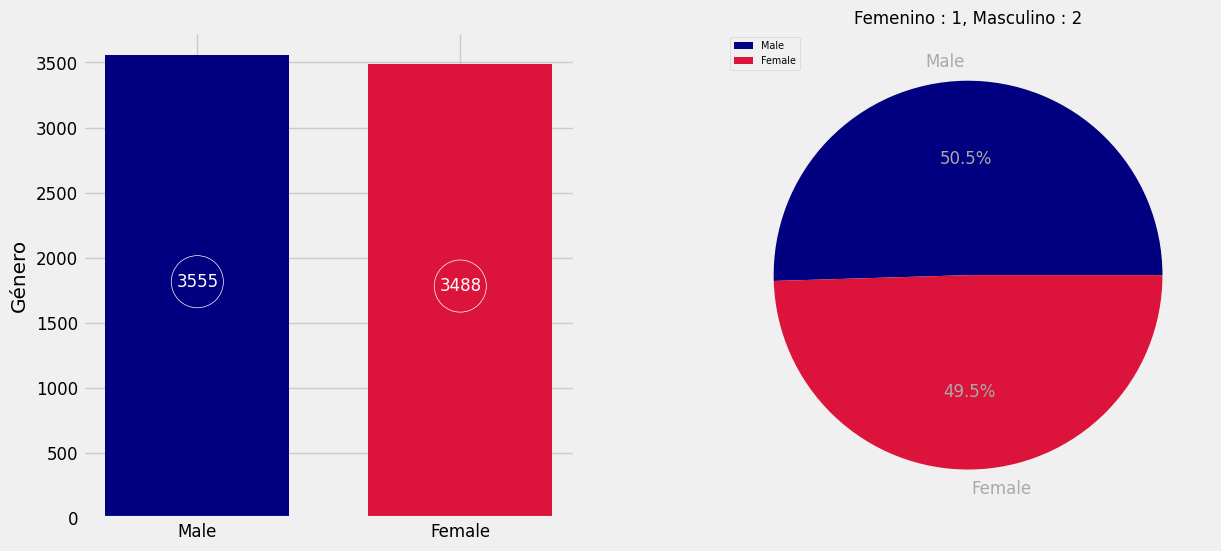

In [54]:
categorical_analyzer = CategoricalAnalysis(df=df)
categorical_analyzer.plot_top_categories(title='Femenino : 1, Masculino : 2', labely='Género', column_name='gender')

- Poseemos 3555 usuarios masculinos y 3488 femeninos.

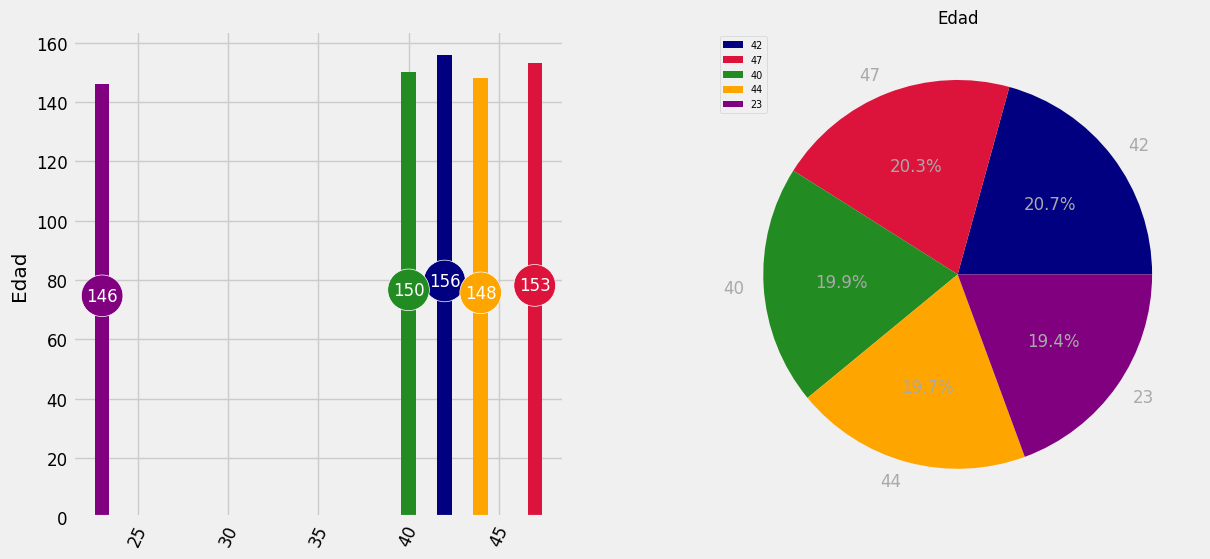

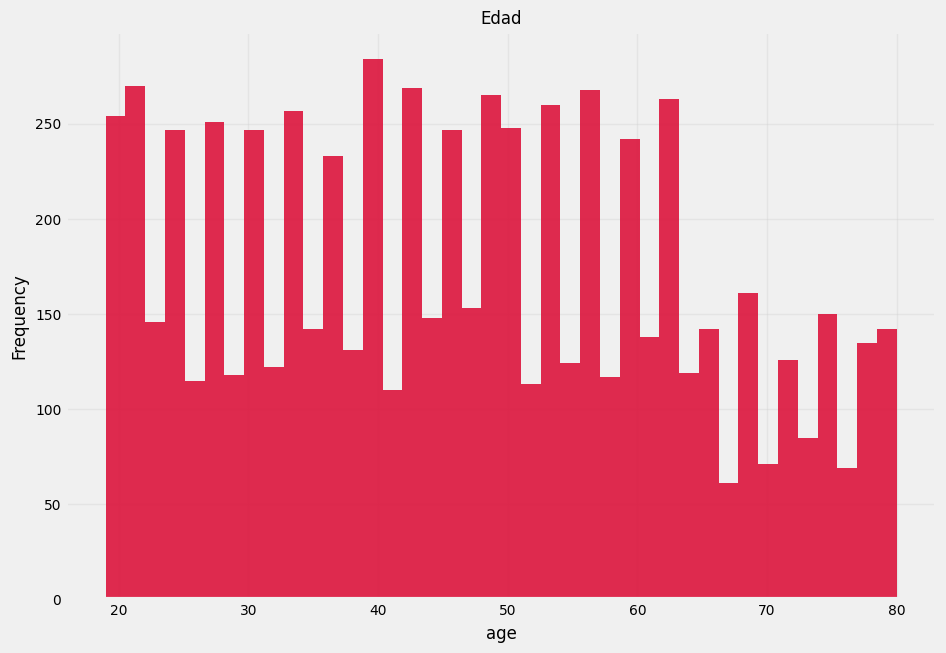

La distribución es platicúrtica con una curtosis de -1.0. Los datos se encuentran dispersos.
La distribución se encuentra sesgada hacia la izquierda 0.16.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
age,7043.0,46.509726,46.0,42,16.75,19.0,32.0,46.0,60.0,80.0,-1.0,0.16


In [55]:
categorical_analyzer.plot_top_categories(title='Edad', labely='Edad', column_name='age')
categorical_analyzer.plot_distribution(title= 'Edad', column_name='age', cant_bins = 40, color='crimson', rotation=0, alpha=0.9)

- Notamos que en el top cinco de categoria de edad se encuentra dentro del rango de 40 a 47 años excepto por el quinto puesto donde los usuarios presentan una notoria juventud en los 23 años con el 19,4% del total. Podemos notar también que nuestra mediana se encuentra en los 46 años de edad y los usuarios de 42 años abarcan un 20,7% del total tomando posición en moda, es decir, nuestro público de mayor presencia sería dentro de ese rango (40 a 47) por ende nuestras acciones deben de preservar y acondicionarse a dicho objetivo presentado.

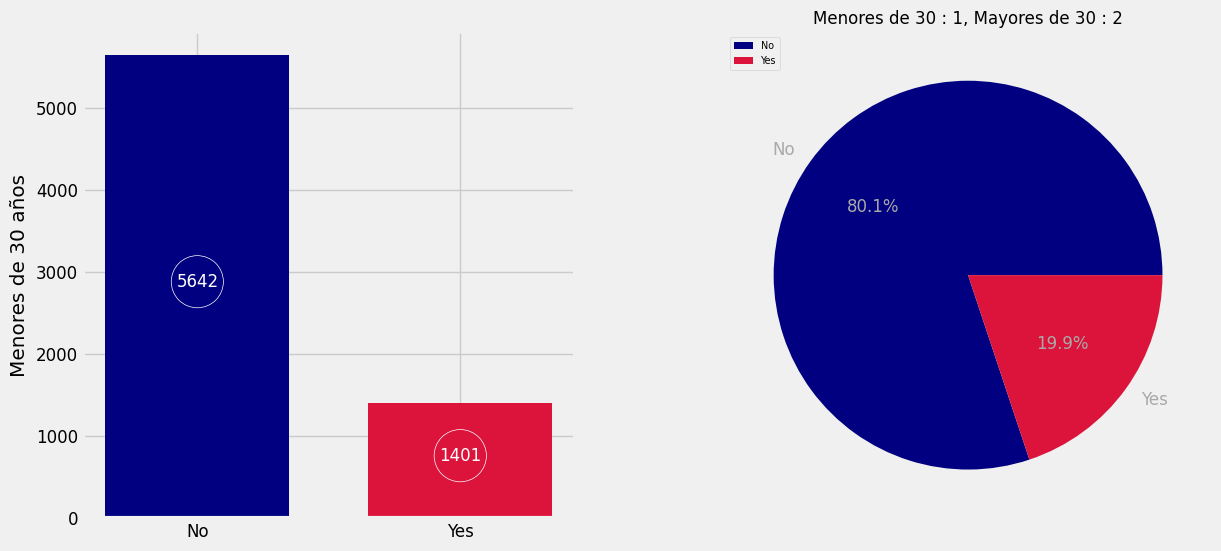

In [56]:
categorical_analyzer.plot_top_categories(title='Menores de 30 : 1, Mayores de 30 : 2', labely='Menores de 30 años', column_name='under_30')

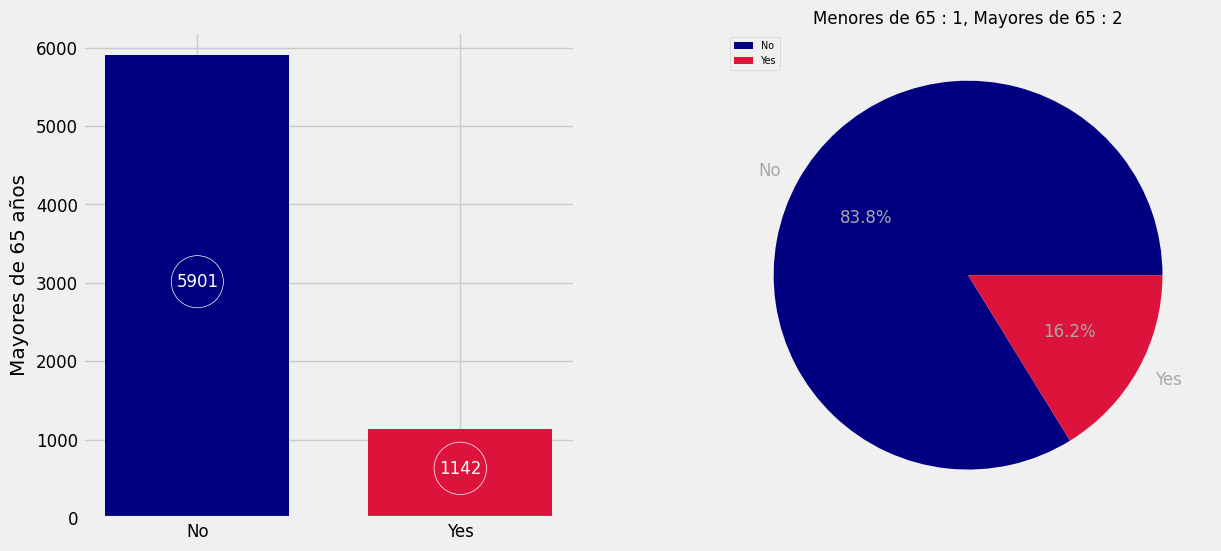

In [57]:
categorical_analyzer.plot_top_categories(title='Menores de 65 : 1, Mayores de 65 : 2', labely='Mayores de 65 años', column_name='senior_citizen')

- Como vimos anteriormente nuestro rango de edad es entre 40 y 47 años apróximadamente y solo un pequeña porción es menor a 30 años, el quinto puesto de 23 con 19,4% del total y otro porción mayor a 65 de años siendo de 1142 usuarios.

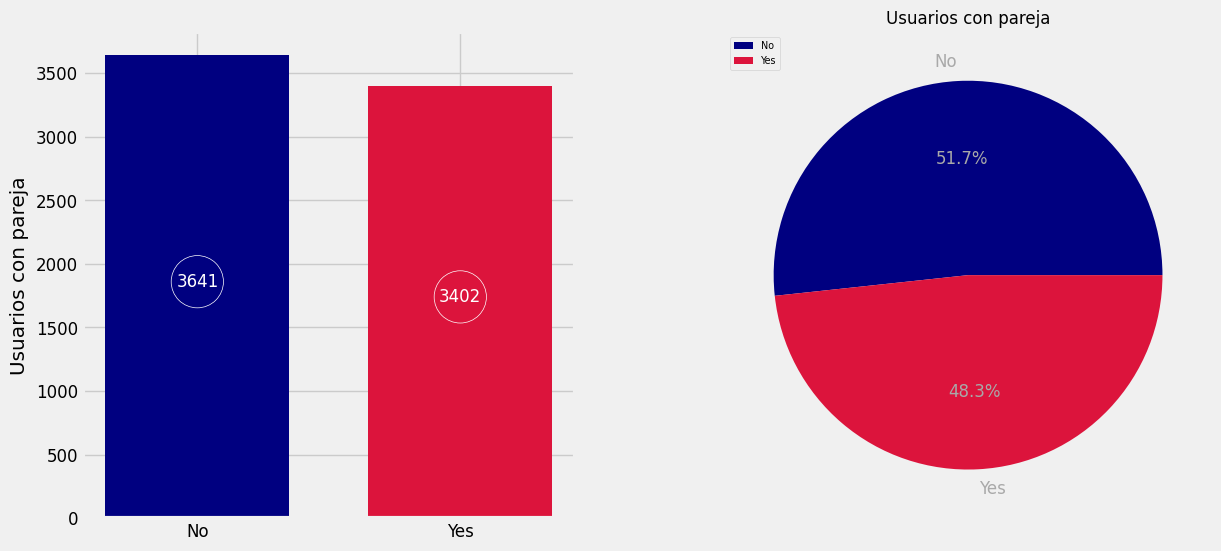

In [58]:
categorical_analyzer.plot_top_categories(title='Usuarios con pareja', labely='Usuarios con pareja', column_name='partner')

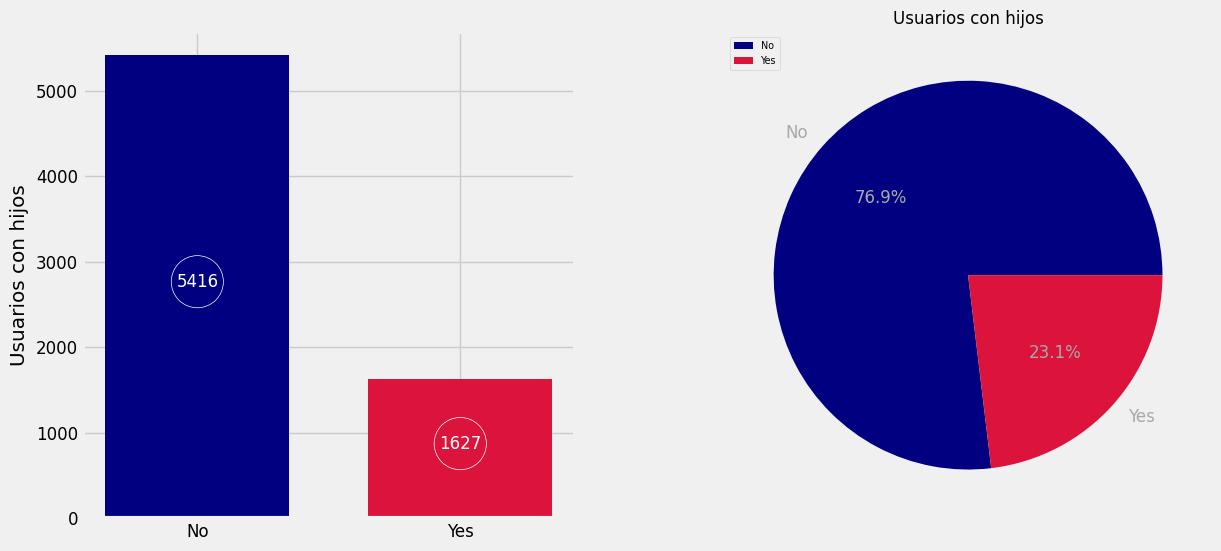

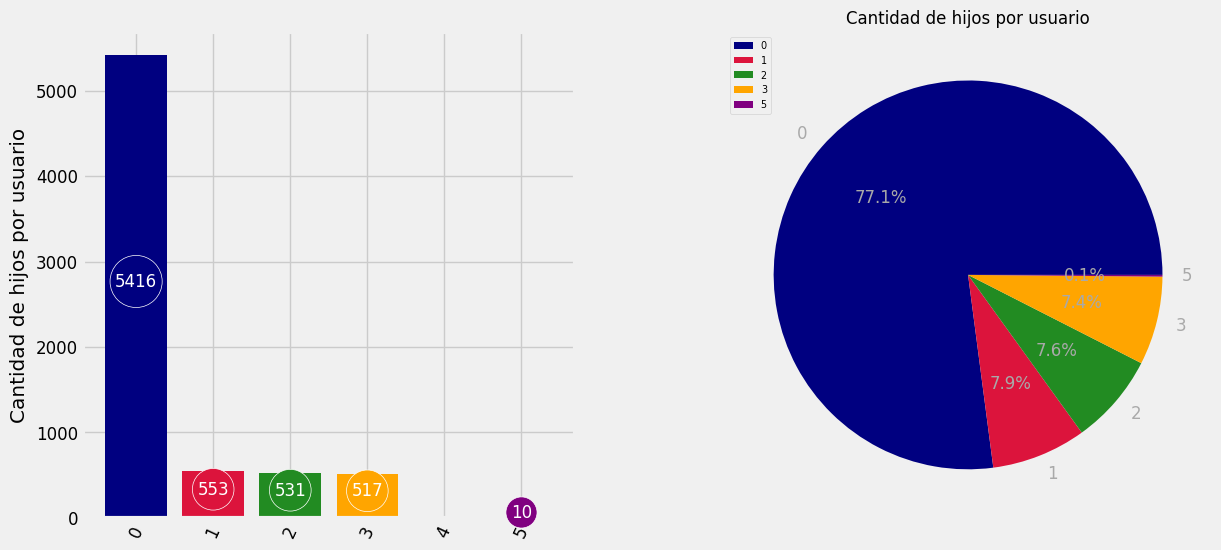

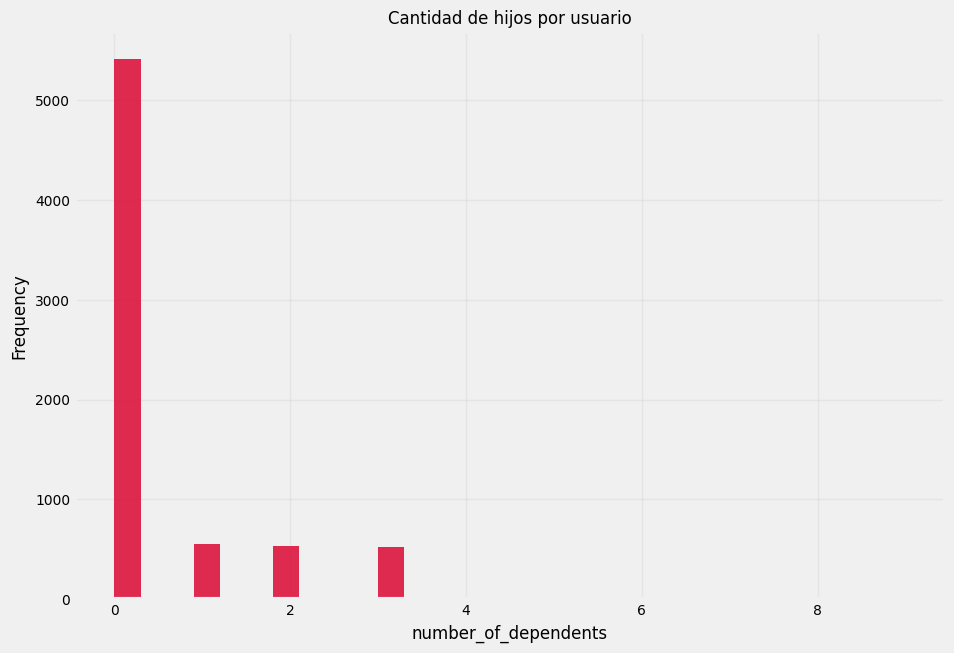

La distribución es leptocúrtica con una curtosis de 4.44. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 2.11.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
number_of_dependents,7043.0,0.468692,0.0,0,0.96,0.0,0.0,0.0,0.0,9.0,4.44,2.11


In [59]:
categorical_analyzer.plot_top_categories(title='Usuarios con hijos', labely='Usuarios con hijos', column_name='dependents')
categorical_analyzer.plot_top_categories(title='Cantidad de hijos por usuario', labely='Cantidad de hijos por usuario', column_name='number_of_dependents')
categorical_analyzer.plot_distribution(title= 'Cantidad de hijos por usuario', column_name='number_of_dependents', cant_bins = 30, color='crimson', rotation=0, alpha=0.9)

In [60]:
df[df['number_of_dependents'] == 9]

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents
2666,3787-TRIAL,Male,23,Yes,No,Yes,Yes,9
